In [20]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

data_real_gdp = pd.read_excel("data/USA_RealGDP.xlsx", skiprows=5)
data_real_gdp = data_real_gdp.melt(["GeoFips", "GeoName"], var_name="Year", value_name="Real GDP")
data_real_gdp["GeoName"] = data_real_gdp["GeoName"].str.strip(" *")
data_real_gdp["Real GDP"] = pd.to_numeric(data_real_gdp["Real GDP"]) * 1_000_000
data_real_gdp.head()

c:\Users\jirip\repos\DKMEN\env\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,GeoFips,GeoName,Year,Real GDP
0,00000,United States,1997,1.152916e+13
1,01000,Alabama,1997,1.445012e+11
2,02000,Alaska,1997,4.221130e+10
3,04000,Arizona,1997,1.684088e+11
4,05000,Arkansas,1997,8.257130e+10


In [21]:
data_population = pd.read_excel("data/USA_Population.xlsx", skiprows=5)
data_population = data_population.melt(["GeoFips", "GeoName"], var_name="Year", value_name="Population")
data_population["GeoName"] = data_population["GeoName"].str.strip(" *")
data_population = data_population[data_population["Population"] != "(NA)"].reset_index(drop=True)
data_population["Population"] = pd.to_numeric(data_population["Population"])
data_population.head()

c:\Users\jirip\repos\DKMEN\env\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,GeoFips,GeoName,Year,Population
0,00000,United States,1929,121769000.0
1,01000,Alabama,1929,2644000.0
2,04000,Arizona,1929,430000.0
3,05000,Arkansas,1929,1852000.0
4,06000,California,1929,5531000.0


In [22]:
data_abbr = pd.read_csv("data/StateAbbr.csv")
data_abbr = data_abbr[["state", "code"]]
data_abbr.head()

,state,code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [23]:
data_merged = pd.merge(data_real_gdp, data_population, on=["GeoName", "GeoFips", "Year"])
data_merged = data_merged.merge(data_abbr, left_on="GeoName", right_on="state")
data_merged["GDP per capita"] = data_merged["Real GDP"] / data_merged["Population"]
data_merged["log GDP per capita"] = numpy.log(data_merged["GDP per capita"])
data_merged.head()

,GeoFips,GeoName,Year,Real GDP,Population,state,code,GDP per capita,log GDP per capita
0,01000,Alabama,1997,1.445012e+11,4367935.0,Alabama,AL,33082.268852,10.406753
1,01000,Alabama,1998,1.495682e+11,4404701.0,Alabama,AL,33956.493301,10.432835
2,01000,Alabama,1999,1.549002e+11,4430141.0,Alabama,AL,34965.072218,10.462105
3,01000,Alabama,2000,1.572213e+11,4452173.0,Alabama,AL,35313.385172,10.472017
4,01000,Alabama,2001,1.568532e+11,4467634.0,Alabama,AL,35108.784650,10.466207


In [24]:
first_year = "2000"
last_year = "2019"

data_merged_growth = data_merged[data_merged["Year"].isin([first_year, last_year])].reset_index(drop=True)
data_merged_growth = data_merged_growth.sort_values(["GeoName", "Year"])
data_merged_growth[f"log GDP per capita {first_year}"] = data_merged_growth["log GDP per capita"].shift()
data_merged_growth = data_merged_growth[data_merged_growth["Year"] == last_year]
data_merged_growth["Ratio"] = data_merged_growth["log GDP per capita"] / data_merged_growth[f"log GDP per capita {first_year}"]
data_merged_growth.head()

,GeoFips,GeoName,Year,Real GDP,Population,state,code,GDP per capita,log GDP per capita,log GDP per capita 2000,Ratio
1,01000,Alabama,2019,2.034327e+11,5003418.0,Alabama,AL,40658.745681,10.612969,10.472017,1.013460
3,02000,Alaska,2019,5.343380e+10,734823.0,Alaska,AK,72716.558954,11.194324,11.046963,1.013340
5,04000,Arizona,2019,3.253953e+11,7070511.0,Arizona,AZ,46021.468604,10.736863,10.606354,1.012305
7,05000,Arkansas,2019,1.171262e+11,3004248.0,Arkansas,AR,38986.861271,10.570980,10.420849,1.014407
9,06000,California,2019,2.729226e+12,39547996.0,California,CA,69010.470214,11.142014,10.817878,1.029963


c:\Users\jirip\repos\DKMEN\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jirip\repos\DKMEN\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jirip\repos\DKMEN\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jirip\repos\DKMEN\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


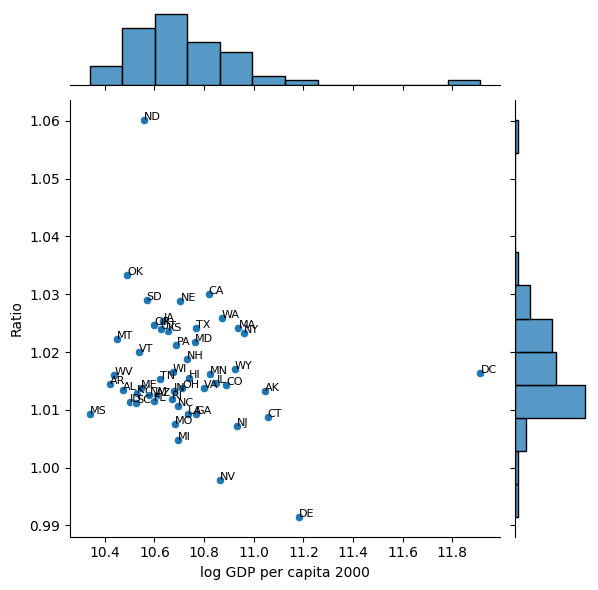

In [25]:
sns.jointplot(data_merged_growth, x=f"log GDP per capita {first_year}", y="Ratio", kind="scatter")
for line in range(0, data_merged_growth.shape[0]):
    plt.annotate(data_merged_growth["code"].iloc[line], (data_merged_growth[f"log GDP per capita {first_year}"].iloc[line], data_merged_growth["Ratio"].iloc[line]), fontsize=8)